# Introduction
Let's find the best 5 cerals among the dataset using the guildelines outlined in the US Governments Dietary
Guidelines’ Executive Summary: https://health.gov/sites/default/files/2019-10/DGA_Executive-Summary.pdf

Fields in the dataset:

    Name: Name of cereal
    mfr: Manufacturer of cereal
        A = American Home Food Products;
        G = General Mills
        K = Kelloggs
        N = Nabisco
        P = Post
        Q = Quaker Oats
        R = Ralston Purina 
    type:
        cold
        hot 
    calories: calories per serving
    protein: grams of protein
    fat: grams of fat
    sodium: milligrams of sodium
    fiber: grams of dietary fiber
    carbo: grams of complex carbohydrates
    sugars: grams of sugars
    potass: milligrams of potassium
    vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended
    shelf: display shelf (1, 2, or 3, counting from the floor)
    weight: weight in ounces of one serving
    cups: number of cups in one serving
    rating: a rating of the cereals (Possibly from Consumer Reports?)


The following curl command will download the dataset to the current folder. I have turned this cell into a markdown cell as running unknown curl commands are a security hazard. Please make sure the `cereal.csv` file is present in the current working folder. 


# Libraries
Let's use only pandas and numpy for this analysis. 

In [1]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt

# Some styling choices for graphs
sns.set_style('darkgrid')
sns.set_palette('deep')

# First Look

In [2]:
# Read the .csv file into a pandas df
filename = 'cereal.csv'
cereal_df = pd.read_csv(filename)
cereal_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [3]:
# Check for NaN values 
print('NaN values:', cereal_df.isnull().values.any())
# get general information on each column
cereal_df.info()

NaN values: False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [4]:
# Get the basic statsistics of the columns
cereal_df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


We can see that while no column has NaN values, several columns use -1 as a value to represent missing information. For machine learning problems we could use different methods to replace the missing values such as using the column or manufacturer mean or simply replacing the value with zero. 

However, for consideration of which cereals best fit the dietary guidelines we will disregard cereals with any missing values as there is a large amount on uncertainty for replacement in this dataset.

In [5]:
# convert -1 values to NaN
cereal_df = cereal_df.applymap(lambda x: np.nan if x == -1 else x)
# use panda's .dropna() with the default values to drop any row with NaN values
cereal_df = cereal_df.dropna(axis='index', how='any')
cereal_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
5,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


We can see that one row with a -1 value `iloc[4]: Almond Delight` has been dropped, as well as 3 rows in total (77 rows to 74 now). Great.

Next, we should drop the columns for `shelf` and `rating` since they are irrelevant to our consideration. (`rating` is a none defined rating from possibly some consumer report. Let's not use metrics that we don't understand and are not cited).

In [6]:
cereal_df = cereal_df.drop(['shelf','rating'],axis=1)

Finally, we should consider that the cereals listed are defined as <b>one serving</b>. However, there is no uniform definition to serving size by cups or weight. We note though that the majority of samples have weight 1.0, while amount of cups per serving is more varied. Based on this, let's normalize the sample information to 1.0 ounce of weight. It is important that we normalize the sample values to a weight or volume metric for impartial comparison. 

In [7]:
print('weight \n', cereal_df['weight'].value_counts(), '\n')

print('cups \n', cereal_df['cups'].value_counts())

weight 
 1.00    61
1.33     5
0.50     2
1.50     2
1.25     2
0.83     1
1.30     1
Name: weight, dtype: int64 

cups 
 1.00    29
0.75    15
0.67    12
0.50     7
0.33     3
0.88     2
1.50     1
1.33     1
1.13     1
0.80     1
0.25     1
1.25     1
Name: cups, dtype: int64


In [8]:
# copy the dataset so far for further consideration
non_normal_df = cereal_df.copy()

# create a new dataset from only the numerical columns
num_df = cereal_df.select_dtypes(include=[np.number])
# normalize each row by its corresponding weight to 1.0 ounce
weight_norm_df = num_df.div(num_df['weight'], axis='rows')
# check that our normalization worked, all weights should be 1.0
print('weight \n', weight_norm_df['weight'].value_counts())

weight 
 1.0    74
Name: weight, dtype: int64


In [9]:
# replace the original numerical columns with the weight normalized values
cereal_df[weight_norm_df.columns] = weight_norm_df
# We can drop the weight and cups columns now. All weight values are 1.0 and cups are irrelevant
cereal_df.drop(columns=['weight','cups'], axis=1, inplace=True)

There is still a lot of information to process. Let's throw all the columns into a large `seaborn PairGrid` and see if there are any correlations that stick out. 

What is most clear is that Potassium and Fiber are strongly correlated. And it seems that Vitamins is poorly distributed. 
Carbohydrates are related to sugars, but carbohydrates are not a consideration in our current guidelines (more details soon).

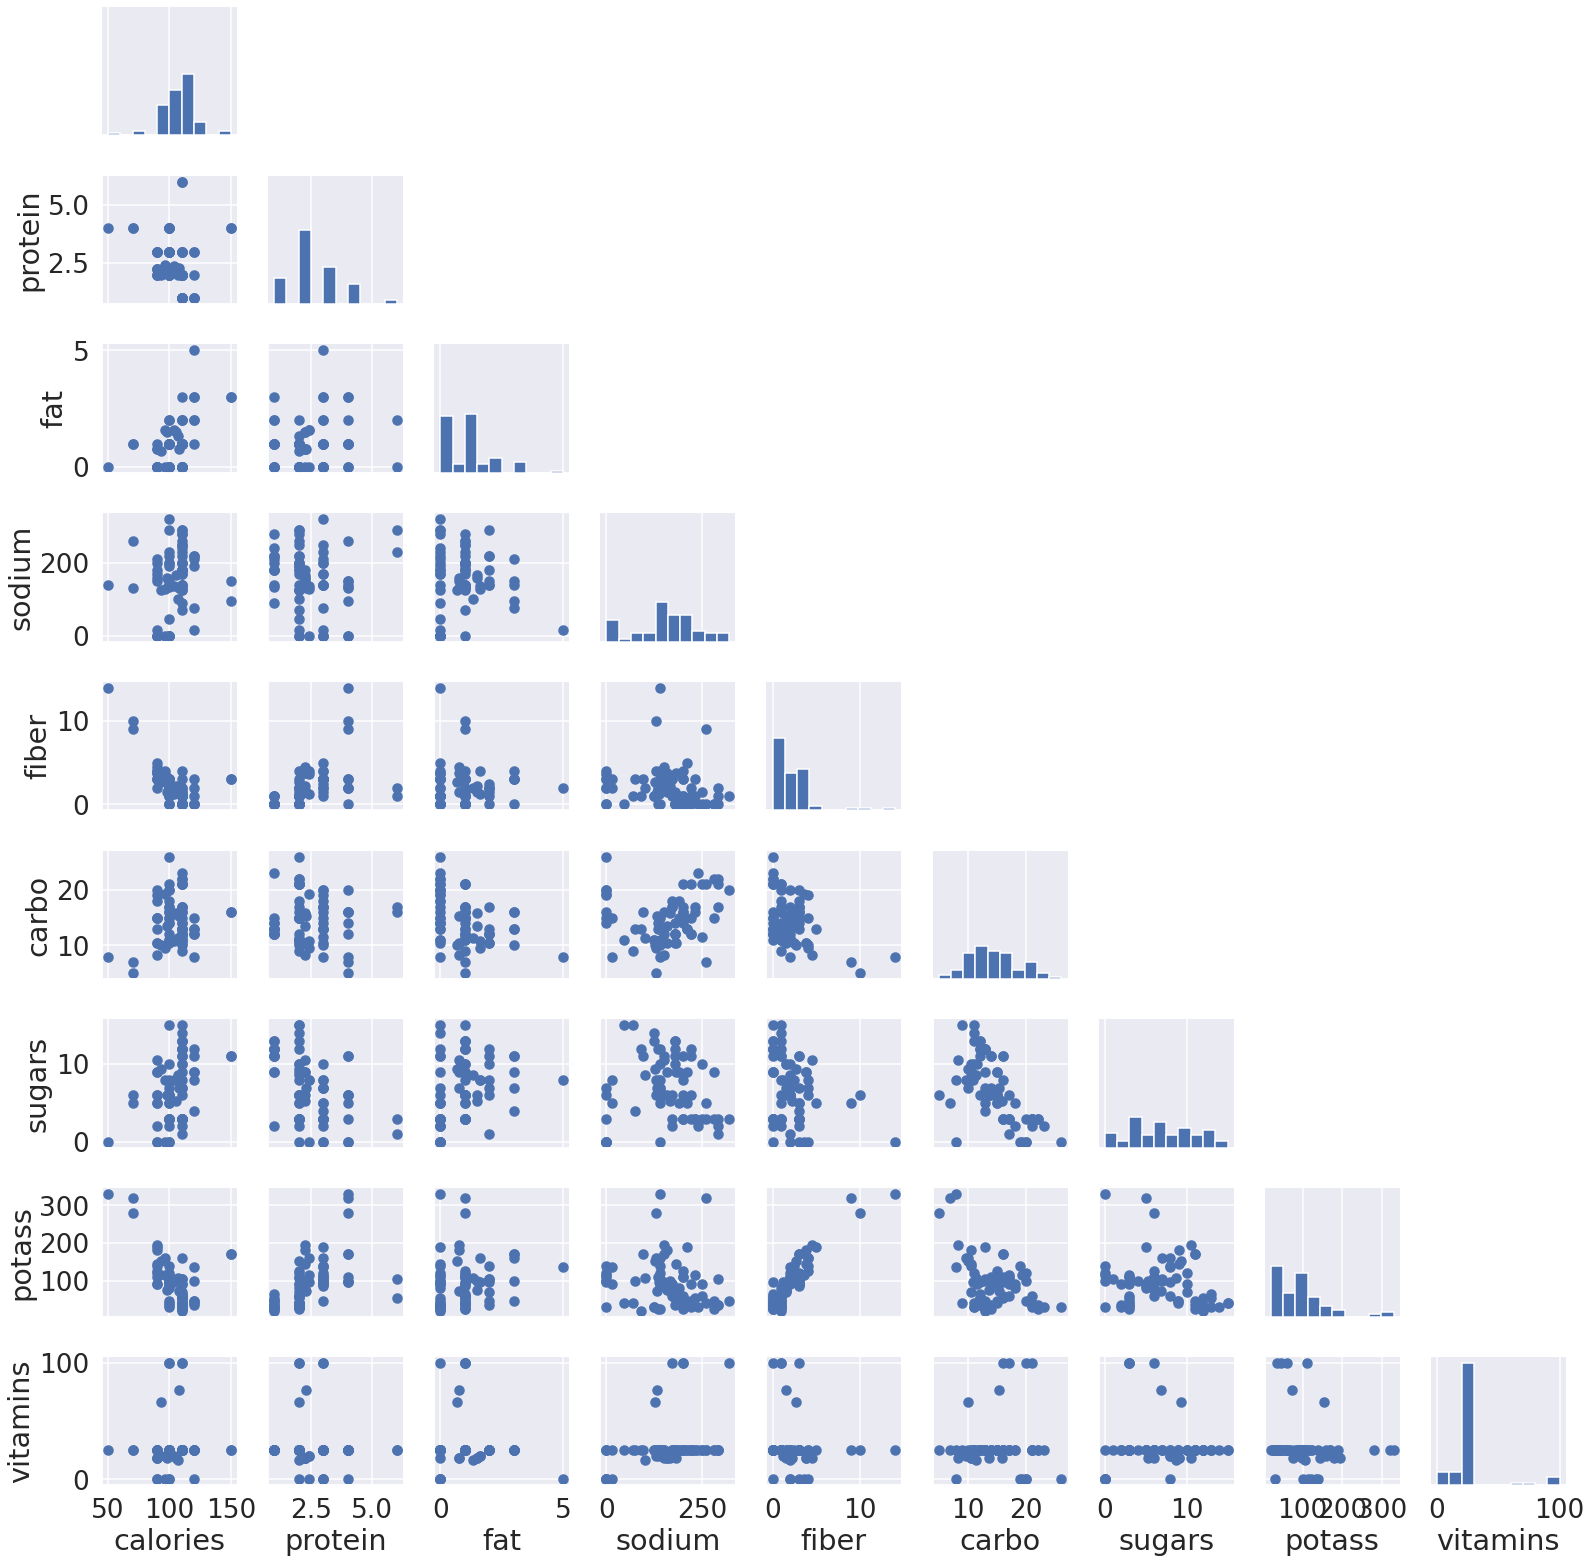

In [10]:
sns.set_context('talk', font_scale = 1.6) 

ceral_g = sns.PairGrid(cereal_df, corner=True)
# different plot to use on the diagonal
ceral_g.map_diag(plt.hist)
# type of plot for lower half of the grid
ceral_g.map_lower(plt.scatter)

# Selection

They key recommendations from the Dietary Guidelines are: 
1. Focus on nutrient density, variety, and amount. 
2. Limit calories from added sugars and saturated fats and reduce sodium intake

Variety and amount refer to food selection in general and are not relevant to our cereal selection.<b> Nutrient Dense </b> foods, are those that are high in natural minerals, vitamins, and other naturally occurring substances such as fiber. Therefore we should have a preference for cereals high in protein, fiber, potassium, and 'vitamins'. 

More strict guidelines are given for sugars, saturated fats, and sodium.

- Consume less than 10 percent of calories per day from added sugars
- Consume less than 10 percent of calories per day from saturated fats
- Consume less than 2,300 milligrams (mg) per day of sodium


To get started, let's first take a look at our "good" variables: protein, fiber, potassium,  and 'vitamins'.
Vitamins appear to be more categorical (there were only 3 values before our weight normalization created a few more). As fiber and potassium see strongly correlated, we can plot protein against potassium and it will give us a general sense of the relation to fiber.

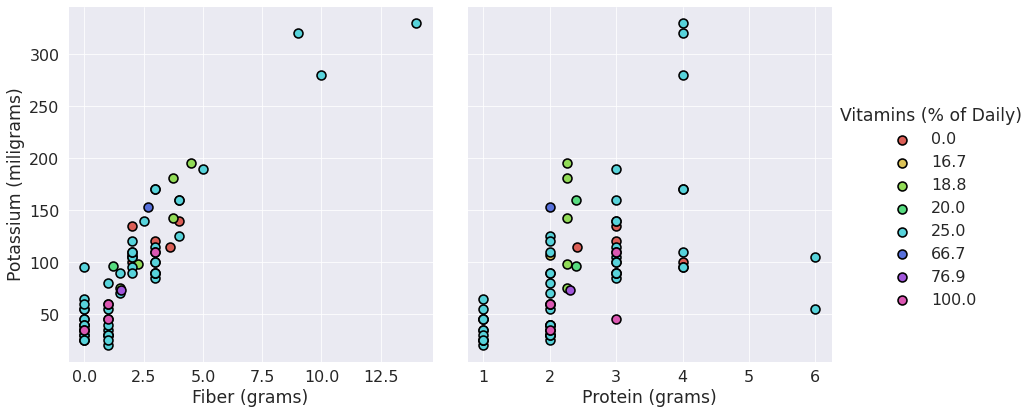

In [11]:
# As mentioned, normalizing by weight caused some new vitamin values to be created
# we should round up the values to be readable.
cereal_df['vitamins'] = cereal_df['vitamins'].round(1)

# seaborn size setting
sns.set_context('paper',font_scale = 1.8)

# It's good practice to wrap graphs in functions
# but the PairGrid is already a streamlined graph cal
cereal_g = sns.PairGrid(cereal_df, hue='vitamins',
                       x_vars=['fiber','protein'],
                       y_vars=['potass'],
                       height=6, aspect=1,
                       palette='hls',
                       )
# use scatter plots for our grid
cereal_g.map(plt.scatter,**{'edgecolor':'k', 's':80, 'linewidth':1.6}) # changing symbols on plot
cereal_g.add_legend(title='Vitamins (% of Daily)')

# nice labels
cereal_g.axes[0,0].set_xlabel('Fiber (grams)')
cereal_g.axes[0,1].set_xlabel('Protein (grams)')
cereal_g.axes[0,0].set_ylabel('Potassium (miligrams)')
plt.savefig('Good_variables.png')

There doesn't seem to be a strong selection for our 'good' variables, the values with the best protein do not have the highest vitamin percentage, or potassium. The higher values of fiber do not have a strong presence of vitamins as well. The 'best' cereals do not clearly standout.

Let us consider the limits the guidelines emphasize for our 'bad' variables.

To consider fat and sugars as a percentage of calories, convert them to calories based on the FDA given conversion of each. 1 gram of fat is 9 calories, 1 gram of sugar is 4 calories. 

In [12]:
# Use for loop to apply a simple lambda function conversion to 
# each column.
col_list = ['fat','sugars']
cal_conv = [9,4]
for col,val in zip(col_list, cal_conv):
    cereal_df[col] = cereal_df[col].apply(lambda x: x*val)

In [13]:
# Create a new column so we can mark those samples 
# which meet the sugar limit and those that don't.
cereal_df['sugars_criteria'] = cereal_df.apply(lambda row: 1 if row.sugars/row.calories < 0.1 else 0, axis=1)

In [14]:
# The recommended intake of salt is 2300 mg
# While daily caloric intake is more varied, let's use 2000 calories as our estimator.
daily_cal = 2000
daily_salt = 2300


### This function has very little generality 
#   but it is good practice to keep all these functions in one place
#   so that calling them is clean. ###
def cal_compare_df(input_df, col='sugars'):
    
    
    """
    Removes rows from a DataFrame that are selected by a given variable criteria.
    For fats and sugars, that is more than 10% of total calories.
    For vitamins and sodium it is the proportion of daily intake compared to percentage of daily 
    calorie intake.

    Parameters
    ----------
    input_df: pd.DataFrame
        The DataFrame for manipulation.
    col: str
        The desired variable by which to limit the dataset. 
        
    Returns
    -------
    output_df: pd.DataFrame
        The rows from the input DataFrame which satisfy a given variable criteria.
    
    """
    
    
    ### input handling ###
    if type(col) != str:
        raise TypeError('Please input a column name as a str.')
        
    output_df = input_df.copy()
    
    ### Amount of sodium intake in proportion to amount of daily calorie intake
    if col == 'sodium':
        output_df[col] = output_df.apply(lambda row: row[col] if (row.sodium/daily_salt) < (row.calories/daily_cal) else np.NaN, axis=1)

        
    ### Amount of vitamins in proportion to amount of daily calorie intake
    elif col == 'vitamins':
        output_df[col] = output_df.apply(lambda row: row[col] if (row.calories/daily_cal) < row[col] else np.NaN, axis=1)
    ### fats and sugars, selected to be less than 10 percent of total calories 
    else:
        output_df[col] = output_df.apply(lambda row: row[col] if row[col]/row.calories < 0.1 else np.NaN, axis=1)
        
    return output_df.dropna(axis='index', how='any')

In [15]:
# Defining a simple linear line that is the selection limit of fat and sugars
# x is 1/10 of y.
x_line_10 = np.linspace(-0,70)
y_line_10 = x_line_10*10

def cal_compare_plot(df, title=None, col='sugars', ylabel=False, legend=False):
    
    """
    Scatter plot for given input column versus calories.
    
    Parameters
    ----------
    df: pd.DataFrame
        Input DataFrame with a '_criteria' column with 0/1 values. 0 are 'bad' samples while 1 are 'good'.
    title: str
        Include a title of input str, or None for no title.
    col: str
        The x axis, also selects the correct '_criteria' to use.
    ylabel: bool
        Include a ylabel or not.   
    legend: bool
        Include a legend or not.

    """
    

    ### This simple method uses c vector to plot 
    # the different criteria samples so class
    # but it makes a legend difficult.
    
#     plt.scatter(df[col], df['calories'],c=df[col+'_criteria'], cmap='Set1_r',s=60,
#            edgecolor='k',linewidth=1.8)

    ### Instead split the '_criteria' 0 and 1 values into different samples for cleaner plotting. 

    # Plot the decision boundary/ criteria limit
    plt.plot(x_line_10, y_line_10, linewidth=4, linestyle='--', color='k')

    # get those samples which satisfy the criteria
    x1 = df[col].loc[df[col+'_criteria'] == 1]
    y1 = df['calories'].loc[df[col+'_criteria'] == 1]
    
    # plot them as green
    # zorder is so that the point are ontop of the linear line
    plt.scatter(x1, y1, color='g',s=70,
           edgecolor='k',linewidth=1.8, label='Good',zorder=20)
    
    # get those samples which do not satisfy the criteria

    x0 = df[col].loc[df[col+'_criteria'] == 0]
    y0 = df['calories'].loc[df[col+'_criteria'] == 0]
    # plot them as red
    plt.scatter(x0, y0, color='r', s=70,
           edgecolor='k', linewidth=1.8, label='Bad', zorder=20)

    plt.ylim(40,160)
    plt.xlim(-5,65)
    plt.title(title)
    
    plt.xlabel('Sugars (calories)')
    if ylabel:
        plt.ylabel('Calories (per serving)')
    else:
        plt.gca().set(yticklabels=[])
        
    if legend:
        plt.legend(loc='lower right')


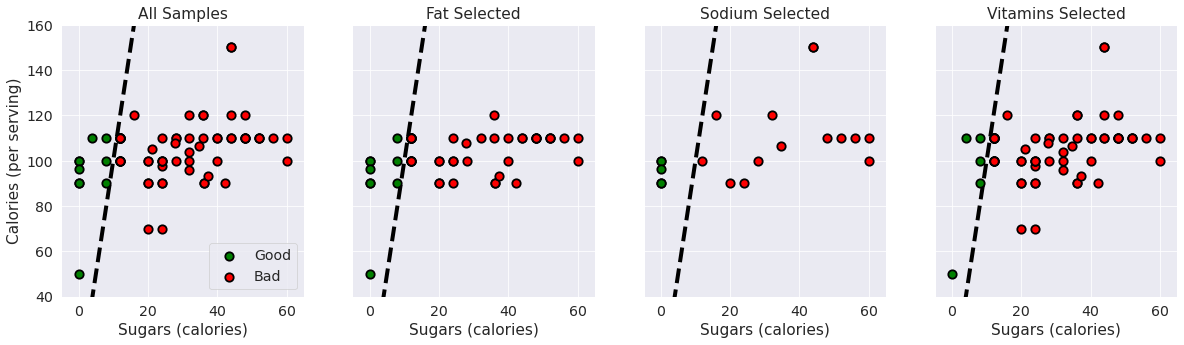

In [16]:
sns.set_context('paper', font_scale = 1.6)

# plot the first plot seperate from a for loop to include ylabel and legend
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
plt.sca(axes[0])
cal_compare_plot(cereal_df, title='All Samples', ylabel=True, legend=True)

# use a for loop to quickly plot the three additional selected samples
select_list = ['fat','sodium','vitamins']
title_list = ['Fat Selected', 'Sodium Selected', 'Vitamins Selected']

for i, (col, title) in enumerate(zip(select_list, title_list)):
    
    plt.sca(axes[i+1])
    select_df = cal_compare_df(cereal_df, col=col)
    cal_compare_plot(select_df)
    plt.title(title)

plt.savefig('Bad_variables_selected.png')
# plt.tight_layout()

The dashed line represents the threshold of 10% of the calories being sugar. The green dots are those with samples with <10% while the red dots are those with >10%. 
Unfortunately, one can see when we remove those samples which do not fit other criteria (e.g., sodium above the recommended amount) there are no 5 cereals which satisfy all guidelines. 

So there are no obvious, healthy cereals which stand above the others.
Instead let's select the best ones we can. <b> We can define a metric </b> by giving a score for each sample calculated from a sum of its rank in each variable column. To ensure good scoring, instead of using the position of each sample in a sorted column for a score value, we can bin the column value ranges and give each sample a value in that column based on which bin it falls into. 

To clarify, the vitamins column has ~50 samples with a value of 25. Those 50 values are tied, but would have a different score based on how they would appear in the sorted column despite having the same value. Instead, if we bin the data and give each of the 50 mentioned samples a score value of (for example) 5 this would give much better results. 

Finally, let's calculate it so that <b>a higher metric score is 'healthier'.</b>

In [17]:
def cereal_ranker(input_df, bins=8):
    
    
    """
    Assigns a metric score for the binned variable columns. 
    Columns are currently hard coded, but can be easily changed in this function.
    A higher rank score is 'healthier'.

    Parameters
    ----------
    input_df: pd.DataFrame
        The DataFrame for manipulation.
    bins: int
        How many bins to separate column values into.
        
    Returns
    -------
    work_df: pd.DataFrame
        The DataFrame will have a 'rank' column. Rank column is the summed columned scores for the 
        variable columns. A higher rank score is 'healthier'.

    
    """
    
    
    cols = ['vitamins','protein', 'potass', 'fiber', 'fat', 'sodium', 'sugars']
    # max if higher value is healthier, min if higher value is unhealthier. 
    order_method = ['max','max','max','max','min','min','min']
        
    work_df = input_df.copy()
    work_df['rank'] = 0 # add the rank column as zeros first
    
    # The vitamins column bins poorly, recall most values are 25, with values also at 0 and 100.
    # Instead convert vitamins scores into integers on the range of 1 to len(unique(vitamins))
    # this allows for better results when binning.
    
    conv_array = np.unique(work_df['vitamins'])
    # create a dict to filter vitamins values with a lambda function
    conv_dict = dict(zip(conv_array,np.arange(1, len(conv_array)+1))) 
    work_df['vitamins'] = work_df.apply(lambda row: conv_dict[row.vitamins], axis=1 )
    
    # loop over columns
    for name, selector in zip(cols, order_method):
        # the bin scores which will be applyed to samples
        labels = np.arange(1, bins+1)

        if selector == 'min':
            # reverse if min, high values should give low score
            labels = labels[::-1]
        
        # pd.cut is used for binning. It out puts a categorical Series. So convert to 
        # numpy for easy summation. 
        work_df['rank'] += pd.cut(work_df[name], bins, labels=labels).to_numpy()

    return work_df

In [18]:
ranked_df = cereal_ranker(cereal_df, bins=8).sort_values('rank', ascending=False)
ranked_df.head(8)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,sugars_criteria,rank
3,All-Bran with Extra Fiber,K,C,50.0,4.0,0.0,140.0,14.0,8.0,0.0,330.0,5,1,47
0,100% Bran,N,C,70.0,4.0,9.0,130.0,10.0,5.0,24.0,280.0,5,0,40
2,All-Bran,K,C,70.0,4.0,9.0,260.0,9.0,7.0,20.0,320.0,5,0,39
64,Shredded Wheat 'n'Bran,N,C,90.0,3.0,0.0,0.0,4.0,19.0,0.0,140.0,1,1,36
26,Frosted Mini-Wheats,K,C,100.0,3.0,0.0,0.0,3.0,14.0,28.0,100.0,5,0,35
43,Maypo,A,H,100.0,4.0,9.0,0.0,0.0,16.0,12.0,95.0,5,0,35
71,Total Whole Grain,G,C,100.0,3.0,9.0,200.0,3.0,16.0,12.0,110.0,8,0,35
55,Puffed Wheat,Q,C,100.0,4.0,0.0,0.0,2.0,20.0,0.0,100.0,1,1,35


Now we can finally give <b>5 best cereals</b>. There are 4 samples tied for the 5th cereal but I use the one that appears first in the sort.
The 5 best cereals are:

- <b>3 All-Bran with Extra Fiber</b>
- <b>0 100% Bran</b>
- <b>2 All-Bran</b>
- <b>64 Shredded Wheat 'n'Bran</b>
- <b>26 Frosted Mini-Wheats </b>

And we can see that our metric score works well because the bottom scores are sugary, clearly unhealthy cereals. And as the metric score decreases the cereals become generally more unhealthy (increased sugars, fats, decreased protein, etc.)


In [19]:
ranked_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,sugars_criteria,rank
3,All-Bran with Extra Fiber,K,C,50.0,4.0,0.0,140.0,14.0,8.0,0.0,330.0,5,1,47
0,100% Bran,N,C,70.0,4.0,9.0,130.0,10.0,5.0,24.0,280.0,5,0,40
2,All-Bran,K,C,70.0,4.0,9.0,260.0,9.0,7.0,20.0,320.0,5,0,39
64,Shredded Wheat 'n'Bran,N,C,90.0,3.0,0.0,0.0,4.0,19.0,0.0,140.0,1,1,36
26,Frosted Mini-Wheats,K,C,100.0,3.0,0.0,0.0,3.0,14.0,28.0,100.0,5,0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,Golden Grahams,G,C,110.0,1.0,9.0,280.0,0.0,15.0,36.0,45.0,5,0,21
14,Cocoa Puffs,G,C,110.0,1.0,9.0,180.0,0.0,12.0,52.0,55.0,5,0,21
35,Honey Graham Ohs,Q,C,120.0,1.0,18.0,220.0,1.0,12.0,44.0,45.0,5,0,19
12,Cinnamon Toast Crunch,G,C,120.0,1.0,27.0,210.0,0.0,13.0,36.0,45.0,5,0,19


In [20]:
def rank_scatter(input_df,x,y, colorbar=False):
    """
    Scatter plot for input x and y columns. Colored by metric scores.
    
    Parameters
    ----------
    df: pd.DataFrame
        Input DataFrame with a 'rank' column
    x: str
        Column from input_df to use for x-axis.
    y: str
        Column from input_df to use for y-axis
    colobar: bool
        Include a colorbar or not.

    """
    x_vals = input_df[x]
    y_vals = input_df[y]
    c_vec = input_df['rank']
    plt.scatter(x_vals, y_vals, c=c_vec, cmap='jet_r',s=80, edgecolor='k', linewidth=2.5)
    
    if colorbar:
        cbar = plt.colorbar()
        cbar.set_label('Metric Score', labelpad=10)

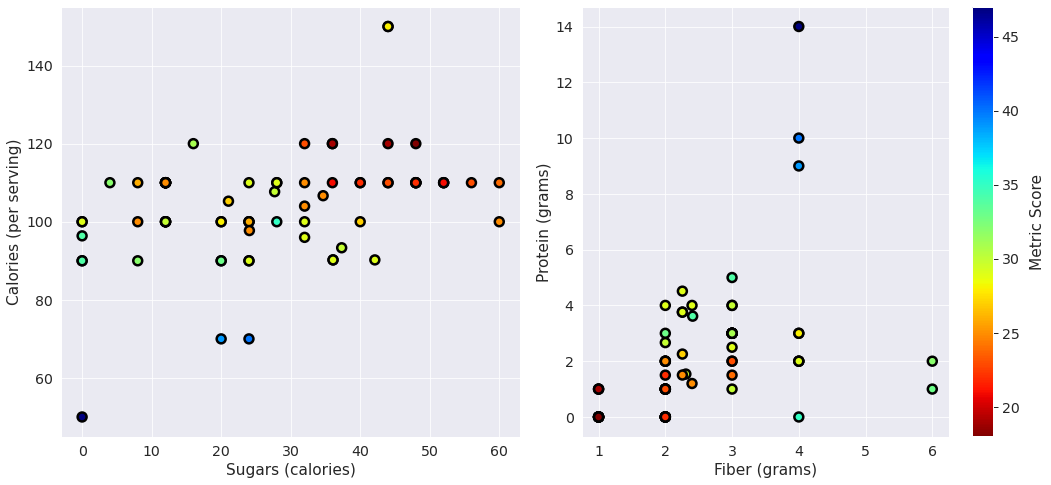

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

plt.sca(axes[0])
rank_scatter(ranked_df,'sugars','calories')
plt.xlabel('Sugars (calories)')
plt.ylabel('Calories (per serving)')

plt.sca(axes[1])
rank_scatter(ranked_df,'protein','fiber', colorbar=True)
plt.xlabel('Fiber (grams)')
plt.ylabel('Protein (grams)')

plt.tight_layout()
plt.savefig('Metric_plot.png')

Another benefit we get from using a metric score to rank our cereals is that it allows us to clearly plot the distribution. We can see that metric scores tend to increase towards lower 'bad' variables like sugar, and increase towards higher 'good' variables like fiber and protein. So <b>the metric score gives us an indicator of how healthy a cereal is in relation to all variables</b>.

_________________________________________________________________________________________________
------
# Bonus

One decision we made was to normalize our dataset by weight. Would we get different results if we normalized by cup size? Normalizing by cup size seems to have preference towards denser, heavy cereals which possibly include things such as dried fruits. 

In [22]:
cup_norm_df = non_normal_df.copy() # call down our non-normalized dataset 
num_df = cup_norm_df.select_dtypes(include=[np.number]) # grab numeric cols
weight_norm_df = num_df.div(num_df['cups'], axis='rows') # normalize by cup size
cup_norm_df[weight_norm_df.columns] = weight_norm_df # add back into df 
cup_norm_df.drop(columns=['weight','cups'], axis=1, inplace=True) # drop weight and cups col

# We have to redo fat and sugar conversion to calories
col_list = ['fat','sugars']
cal_conv = [9,4]
for col,val in zip(col_list,cal_conv):
    cup_norm_df[col] = cup_norm_df[col].apply(lambda x: x*val)
    
# again round the vitamins col
cup_norm_df['vitamins'] = cup_norm_df['vitamins'].round(1)

cup_scored_df = cereal_ranker(cup_norm_df, bins=8).sort_values('rank', ascending=False)
cup_scored_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,rank
3,All-Bran with Extra Fiber,K,C,100.000000,8.000000,0.000000,280.000000,28.000000,16.000000,0.000000,660.000000,11,49
0,100% Bran,N,C,212.121212,12.121212,27.272727,393.939394,30.303030,15.151515,72.727273,848.484848,12,43
2,All-Bran,K,C,212.121212,12.121212,27.272727,787.878788,27.272727,21.212121,60.606061,969.696970,12,41
33,Grape-Nuts,P,C,440.000000,12.000000,0.000000,680.000000,12.000000,68.000000,48.000000,360.000000,13,37
60,Raisin Squares,K,C,180.000000,4.000000,0.000000,0.000000,4.000000,30.000000,48.000000,220.000000,11,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,Apple Cinnamon Cheerios,G,C,146.666667,2.666667,24.000000,240.000000,2.000000,14.000000,53.333333,93.333333,9,24
29,Fruity Pebbles,P,C,146.666667,1.333333,12.000000,180.000000,0.000000,17.333333,64.000000,33.333333,9,24
12,Cinnamon Toast Crunch,G,C,160.000000,1.333333,36.000000,280.000000,0.000000,17.333333,48.000000,60.000000,9,23
1,100% Natural Bran,Q,C,120.000000,3.000000,45.000000,15.000000,2.000000,8.000000,32.000000,135.000000,1,23


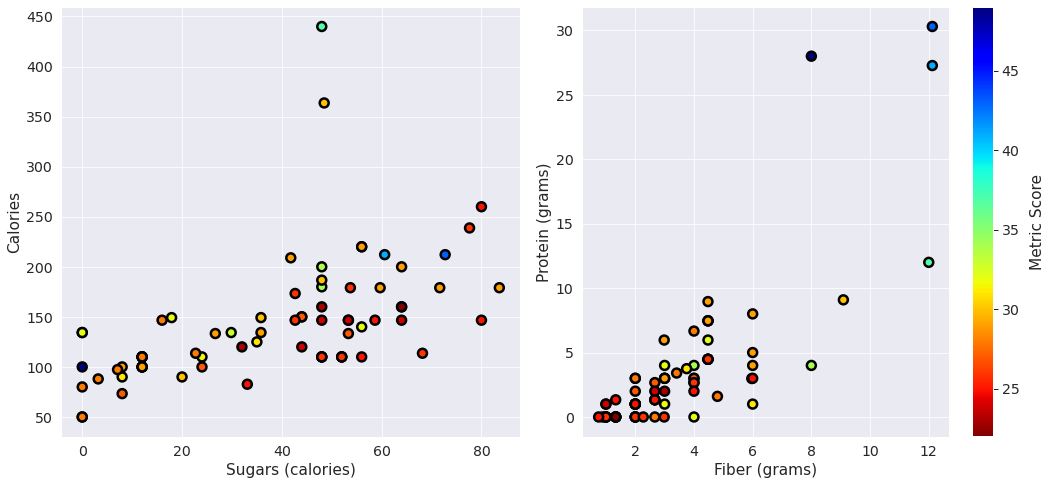

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

plt.sca(axes[0])
rank_scatter(cup_scored_df,'sugars','calories')
plt.xlabel('Sugars (calories)')
plt.ylabel('Calories')

plt.sca(axes[1])
rank_scatter(cup_scored_df,'protein','fiber', colorbar=True)
plt.xlabel('Fiber (grams)')
plt.ylabel('Protein (grams)')

plt.tight_layout()

The top 3 cereals are the same in both normalizations with the bottom cereals being roughly the same as well. However, when we plot the cup normalized dataset we do not see the gradient of scores we see in the weight normalized dataset, with clearly higher scores towards healthier metrics. Thus I am happy to use the weight normalized dataset to give our top 5 cereals.